# Explore here

             name  popularity  duration_minutes formatted_duration
9         Rainman          38          2.683333               2:41
7  Morning Sunset          40          2.921700               2:55
8     Deer Garden          41          3.722500               3:43


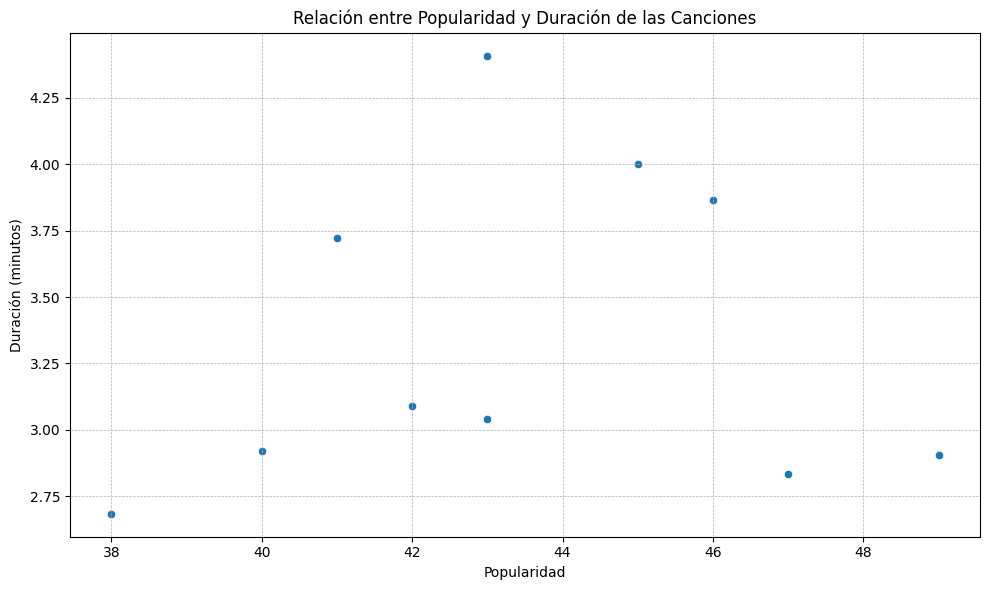

In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Esta función recibe un ID de artista y devuelve las principales canciones de ese artista.
def fetch_top_tracks(artist_id):
    # Establecer conexión con Spotify usando las credenciales.
    con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
    
    # Solicitar las canciones más populares del artista.
    response = con.artist_top_tracks(artist_id)
    
    # Devolver la lista de canciones si hay una respuesta válida, de lo contrario devolver una lista vacía.
    return response['tracks'] if response else []

# Esta función procesa la lista de canciones y extrae datos relevantes.
def process_tracks(tracks):
    data = []
    for track in tracks:
        # Convertir la duración de milisegundos a minutos y segundos.
        minutes = track["duration_ms"] // (1000 * 60)
        seconds = (track["duration_ms"] // 1000) % 60
        duration_minutes = track["duration_ms"] / (1000 * 60)
        
        # Agregar el nombre de la canción, su popularidad, duración en minutos y duración formateada a la lista.
        data.append({
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_minutes": duration_minutes,
            "formatted_duration": f"{minutes}:{seconds:02}"
        })
    return data

# Cargar las variables de entorno.
load_dotenv()

# Obtener las credenciales de Spotify desde las variables de entorno.
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

# ID de un artista específico.
artist_id = "0XtVN1QaB7vYRpw4qEIRt0"

# Obtener las canciones más populares de ese artista y procesar los datos.
tracks = fetch_top_tracks(artist_id)
processed_tracks = process_tracks(tracks)

# Convertir los datos procesados en un DataFrame de Pandas y ordenarlos por popularidad.
tracks_df = pd.DataFrame.from_records(processed_tracks)
tracks_df.sort_values(["popularity"], inplace=True)
print(tracks_df.head(3))

# Crear un gráfico de dispersión para visualizar la relación entre la popularidad y la duración de las canciones.
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_minutes")
plt.title("Relación entre Popularidad y Duración de las Canciones")
plt.ylabel("Duración (minutos)")
plt.xlabel("Popularidad")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Guardar el gráfico como una imagen PNG.
plt.savefig("scatter_plot.png")